**Proyek 1 : Membuat Model NLP dengan TensorFlow**

Hana Octavia Trinida Malo

M05



1. Membaca Dataset

Import Library pandas dan ubah dataset menjadi dataframe. sebelum itu saya menyimpan dataset pada folder file /content/sample_data/

Dataset yang saya pakai adalah dataset berupa review tokopedia yang sudah diberi label : https://www.kaggle.com/datasets/kulitekno/tokopedia-product-review-category-food-and-drink?select=dataset_review_tokped_labelled.csv

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sample_data/dataset_review_tokped_labelled.csv')

2. Menampilkan Sample

Dari dataset yang saya gunakan, berisi 4060 baris data dan 3 kolom

In [ ]:
df

,Review,Rating,Sentiment
0,enak kuacinya,5,positive
1,pengiriman cepat packing bagus sesuai pesanan ...,5,positive
2,pengemasan luar biasa baik untuk rasa menurut ...,4,negative
3,terimakasih min,5,neutral
4,udah order untuk kesekian kali jos,5,neutral
...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,5,neutral
4056,imut2 banget packing aman,5,positive
4057,good product trusted seller,5,positive
4058,sudah beli yg ke 3,5,neutral


3. Lakukan proses one-hot-encoding


In [ ]:
category = pd.get_dummies(df.Sentiment)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Sentiment')
df_baru = df_baru.drop(columns='Rating')
df_baru

,Review,negative,neutral,positive
0,enak kuacinya,0,0,1
1,pengiriman cepat packing bagus sesuai pesanan ...,0,0,1
2,pengemasan luar biasa baik untuk rasa menurut ...,1,0,0
3,terimakasih min,0,1,0
4,udah order untuk kesekian kali jos,0,1,0
...,...,...,...,...
4055,seller sangat responsif rasa belum dicoba kare...,0,1,0
4056,imut2 banget packing aman,0,0,1
4057,good product trusted seller,0,0,1
4058,sudah beli yg ke 3,0,1,0


4. Mengubah nilai-nilai dari dataframe ke dalam tipe data numpy array 

Gunakan atribut values untuk mengubah nilai-nilai tersebut

In [ ]:
review = df_baru['Review'].values
label = df_baru[['negative', 'neutral', 'positive']].values

5. Membagi data train dan data test
test_size = 0.2, karena saya ingin data pada validation set sebesar 20% dari total dataset.

In [ ]:
from sklearn.model_selection import train_test_split
review_latih, review_test, label_latih, label_test = train_test_split(review, label, test_size=0.2)

6. Implementasin Tokenizer dan Sequence.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=500, oov_token='x')
tokenizer.fit_on_texts(review_latih) 
tokenizer.fit_on_texts(review_test)
 
sekuens_latih = tokenizer.texts_to_sequences(review_latih)
sekuens_test = tokenizer.texts_to_sequences(review_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

7. Implementasi Model Sequensial

Untuk arsitektur model saya menggunakan layer Embedding dengan dimensi embedding sebesar 16, serta dimensi dari input sebesar nilai num_words 500, penggunaan dropout, LTSM, 1 hidden layer dan output layer 3 class


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=500, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

8. Mengkompile model yang sudah dibuat

Compile model menggunakan fungsi compile(). Optimizer yang digunakan adalah 'adam', Loss function yang digunakan adalah 'categorical_crossentropy'.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

9. Penggunaan Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.90) and (logs.get('val_accuracy')>0.80):
      print("\nAkurasi telah mencapai >90%!") 
      self.model.stop_training = True
callbacks = myCallback()

10. Pelatihan Model

In [ ]:
history = model.fit(padded_latih, label_latih, epochs=20, 
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/20
102/102 - 13s - loss: 0.8074 - accuracy: 0.7094 - val_loss: 0.6807 - val_accuracy: 0.7118 - 13s/epoch - 123ms/step
Epoch 2/20
102/102 - 10s - loss: 0.5662 - accuracy: 0.7599 - val_loss: 0.5376 - val_accuracy: 0.7759 - 10s/epoch - 96ms/step
Epoch 3/20
102/102 - 12s - loss: 0.4436 - accuracy: 0.8202 - val_loss: 0.5347 - val_accuracy: 0.7882 - 12s/epoch - 120ms/step
Epoch 4/20
102/102 - 10s - loss: 0.3883 - accuracy: 0.8498 - val_loss: 0.5179 - val_accuracy: 0.7956 - 10s/epoch - 97ms/step
Epoch 5/20
102/102 - 10s - loss: 0.3507 - accuracy: 0.8559 - val_loss: 0.5421 - val_accuracy: 0.7968 - 10s/epoch - 100ms/step
Epoch 6/20
102/102 - 10s - loss: 0.3251 - accuracy: 0.8673 - val_loss: 0.5852 - val_accuracy: 0.7931 - 10s/epoch - 97ms/step
Epoch 7/20
102/102 - 10s - loss: 0.3185 - accuracy: 0.8676 - val_loss: 0.5903 - val_accuracy: 0.7845 - 10s/epoch - 96ms/step
Epoch 8/20
102/102 - 10s - loss: 0.3001 - accuracy: 0.8821 - val_loss: 0.6032 - val_accuracy: 0.7931 - 10s/epoch - 97ms/st

11. Membuat plot akurasi dari model

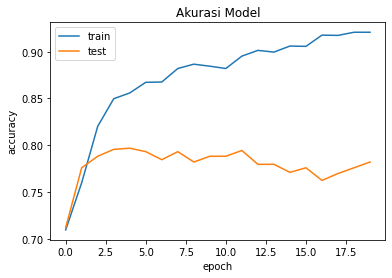

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

12. Membuat plot loss

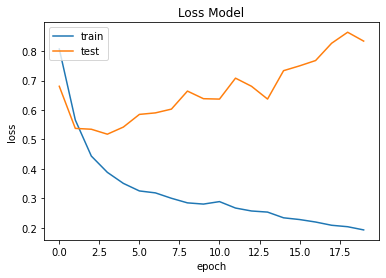

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()